###  imports

In [5]:
import numpy
import pandas
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
from pandas.plotting import autocorrelation_plot
import matplotlib.offsetbox as offsetbox

def saver(fname):
    plt.savefig(fname+".png",bbox_inches="tight")
    
params={
    #"font.size":20,
    "figure.titlesize":"large",
    "lines.linewidth":3,
    #"legend.fontsize":"small",
    #"xtick.labelsize":"x-small",
    #"ytick.labelsize":"x-small",
    #"axes.labelsize": 'small',
}
plt.rcParams.update(params) 

In [2]:
ticker_A="AMZN"
ticker_B="BABA"
color_A="red"
color_B="blue"

## read in data

In [6]:
data_A=pandas.read_csv(ticker_A+".csv",index_col=0)
data_A.index = pandas.to_datetime(data_A.index)
print(data_A.head(10))
adj_A=pandas.Series(data_A["Adj Close"],name=ticker_A)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-01-02  1172.000000  1190.000000  1170.510010  1189.010010  1189.010010   
2018-01-03  1188.300049  1205.489990  1188.300049  1204.199951  1204.199951   
2018-01-04  1205.000000  1215.869995  1204.660034  1209.589966  1209.589966   
2018-01-05  1217.510010  1229.140015  1210.000000  1229.140015  1229.140015   
2018-01-08  1236.000000  1253.079956  1232.030029  1246.869995  1246.869995   
2018-01-09  1256.900024  1259.329956  1241.760010  1252.699951  1252.699951   
2018-01-10  1245.150024  1254.329956  1237.229980  1254.329956  1254.329956   
2018-01-11  1259.739990  1276.770020  1256.459961  1276.680054  1276.680054   
2018-01-12  1273.390015  1305.760010  1273.390015  1305.199951  1305.199951   
2018-01-16  1323.000000  1339.939941  1292.300049  1304.859985  1304.859985   

             Volume  
Date                 
2018-01

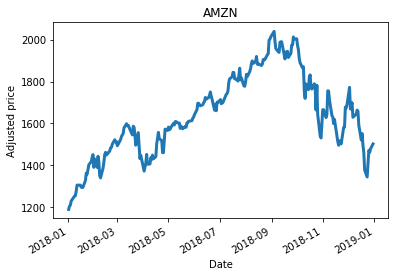

In [7]:
fig, ax = plt.subplots()
plt.plot(adj_A.index,adj_A,label=ticker_A)
plt.ylabel("Adjusted price")
plt.xlabel("Date")
plt.title(ticker_A)
fig.autofmt_xdate()
saver("tickerA")
plt.show()
plt.close()

### guess an upward trend ###

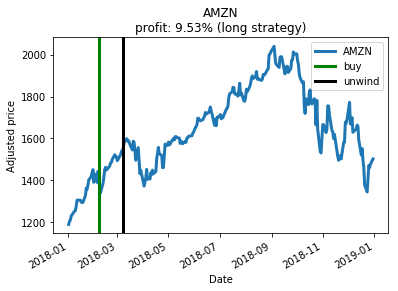

In [8]:
enter_index=25
unwind_index=45
profit=(adj_A[unwind_index]/adj_A[enter_index]-1)
title_str="{}\nprofit: {:.2f}% (long strategy)".format(ticker_A,profit*100)
fig, ax = plt.subplots()
plt.plot(adj_A.index,adj_A,label=ticker_A)
plt.axvline(adj_A.index[enter_index],color="green",label="buy")
plt.axvline(adj_A.index[unwind_index],color="black",label="unwind")
plt.legend()
plt.ylabel("Adjusted price")
plt.xlabel("Date")
plt.title(title_str)
fig.autofmt_xdate()
saver("long")
plt.show()
plt.close()

### guess a downward trend ###

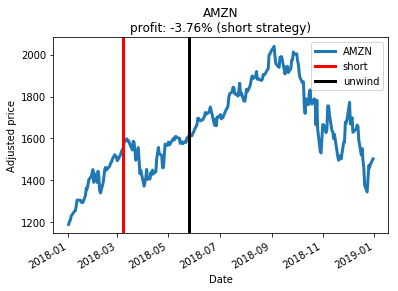

In [9]:
enter_index=45
unwind_index=100
profit=-(adj_A[unwind_index]/adj_A[enter_index]-1)
title_str="{}\nprofit: {:.2f}% (short strategy)".format(ticker_A,profit*100)
fig, ax = plt.subplots()
plt.plot(adj_A.index,adj_A,label=ticker_A)
plt.axvline(adj_A.index[enter_index],color="red",label="short")
plt.axvline(adj_A.index[unwind_index],color="black",label="unwind")
plt.legend()
plt.ylabel("Adjusted price")
plt.xlabel("Date")
plt.title(title_str)
fig.autofmt_xdate()
saver("short")
plt.show()
plt.close()

In [7]:
### loss on long strategy

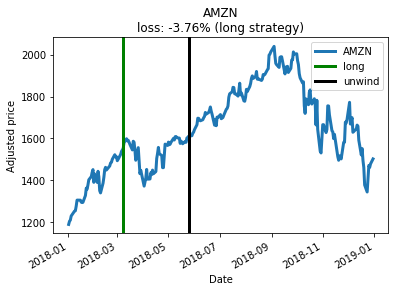

In [10]:
enter_index=45
unwind_index=100
profit=(adj_A[unwind_index]/adj_A[enter_index]-1)
title_str="{}\nloss: {:.2f}% (long strategy)".format(ticker_A,-profit*100)
fig, ax = plt.subplots()
plt.plot(adj_A.index,adj_A,label=ticker_A)
plt.axvline(adj_A.index[enter_index],color="green",label="long")
plt.axvline(adj_A.index[unwind_index],color="black",label="unwind")
plt.legend()
plt.ylabel("Adjusted price")
plt.xlabel("Date")
plt.title(title_str)
fig.autofmt_xdate()
saver("long_loss")
plt.show()
plt.close()

### loss on short strategy

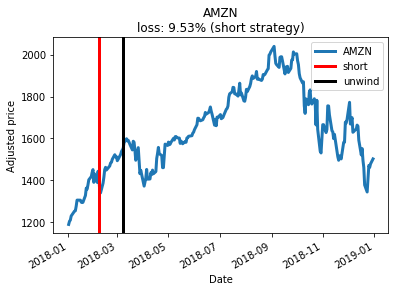

In [11]:
enter_index=25
unwind_index=45
profit=-(adj_A[unwind_index]/adj_A[enter_index]-1)
title_str="{}\nloss: {:.2f}% (short strategy)".format(ticker_A,-profit*100)
fig, ax = plt.subplots()
plt.plot(adj_A.index,adj_A,label=ticker_A)
plt.axvline(adj_A.index[enter_index],color="red",label="short")
plt.axvline(adj_A.index[unwind_index],color="black",label="unwind")
plt.legend()
plt.ylabel("Adjusted price")
plt.xlabel("Date")
plt.title(title_str)
fig.autofmt_xdate()
saver("short_loss")
plt.show()
plt.close()

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-02  176.399002  184.100006  175.699997  183.649994  183.649994   
2018-01-03  185.190002  185.634995  181.399994  184.000000  184.000000   
2018-01-04  185.899994  187.746994  184.429993  185.710007  185.710007   
2018-01-05  187.169998  190.750000  186.300995  190.699997  190.699997   
2018-01-08  190.460007  191.660004  189.070007  190.330002  190.330002   
2018-01-09  191.130005  192.490005  188.000000  190.800003  190.800003   
2018-01-10  188.100006  190.389999  186.580002  189.789993  189.789993   
2018-01-11  189.729996  190.429993  188.100006  188.750000  188.750000   
2018-01-12  189.910004  190.199997  187.250000  187.789993  187.789993   
2018-01-16  190.399994  191.740005  181.750000  182.399994  182.399994   

              Volume  
Date                  
2018-01-02  29916900  
2018-01-03  20121900  
2018-01-04  1947380

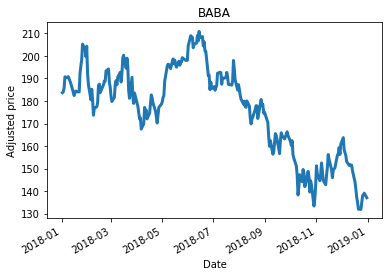

In [12]:
data_B=pandas.read_csv(ticker_B+".csv",index_col=0)
data_B.index = pandas.to_datetime(data_B.index)
print(data_B.head(10))
adj_B=pandas.Series(data_B["Adj Close"],name=ticker_B)

fig, ax = plt.subplots()
plt.plot(adj_B.index,adj_B,label=ticker_B)
plt.ylabel("Adjusted price")
plt.xlabel("Date")
plt.title(ticker_B)
fig.autofmt_xdate()
saver("tickerB")
plt.show()
plt.close()

## Compare the stocks

In [13]:
#trading days are different in different countries
joined_data=pandas.concat([adj_A,adj_B],axis="columns").dropna(axis="index")
print(joined_data.head())
(adj_A,adj_B)=(joined_data[ticker_A],joined_data[ticker_B])

                   AMZN        BABA
Date                               
2018-01-02  1189.010010  183.649994
2018-01-03  1204.199951  184.000000
2018-01-04  1209.589966  185.710007
2018-01-05  1229.140015  190.699997
2018-01-08  1246.869995  190.330002


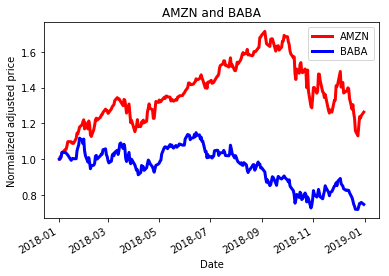

In [14]:
normalized_A=adj_A/adj_A[0]
normalized_B=adj_B/adj_B[0]

fig, ax = plt.subplots()
plt.plot(normalized_A.index,normalized_A,label=ticker_A,color=color_A)
plt.plot(normalized_B.index,normalized_B,label=ticker_B,color=color_B)
plt.legend()
plt.ylabel("Normalized adjusted price")
plt.xlabel("Date")
plt.title(ticker_A+" and "+ticker_B)
fig.autofmt_xdate()
saver("pair")
plt.show()
plt.close()

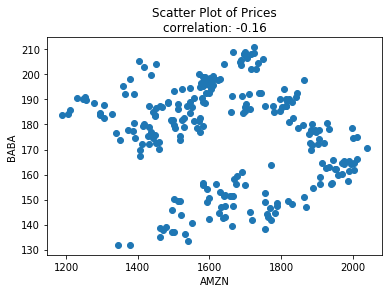

In [17]:
corr,_=scipy.stats.pearsonr(adj_A,adj_B)
title_str="Scatter Plot of Prices\ncorrelation: {:.2f}".format(corr)
plt.scatter(adj_A,adj_B)
plt.xlabel(ticker_A)
plt.ylabel(ticker_B)
plt.title(title_str)
saver("scatter")
plt.show()
plt.close()

## regression

In [18]:
slope, intercept, _,_,_= scipy.stats.linregress(
    adj_A,adj_B)
print("slope: "+str(slope))
print("intercept: "+str(intercept))
portfolio=adj_B-adj_A*slope
portfolio.name="Portfolio"
residual=adj_B-(intercept+adj_A*slope)
residual.name="residual"
print(residual.head())

text_str="{}={:.2f}{}{:+.2f}".format(ticker_B,slope,ticker_A,intercept)
print(text_str)
fig,ax=plt.subplots(figsize=(_,_))
ax.add_artist(offsetbox.AnchoredText(text_str, loc="center",prop=dict(size=30)))
ax.axis('off')
saver("regress_formula")
plt.show()
plt.close()

slope: -0.016044988264872787
intercept: 202.22585931327478
Date
2018-01-02    0.501786
2018-01-03    1.095515
2018-01-04    2.892004
2018-01-05    8.195675
2018-01-08    8.110157
Name: residual, dtype: float64
BABA=-0.02AMZN+202.23


RuntimeError: libpng signaled error

RuntimeError: libpng signaled error

<Figure size 0.451798x0.451798 with 1 Axes>

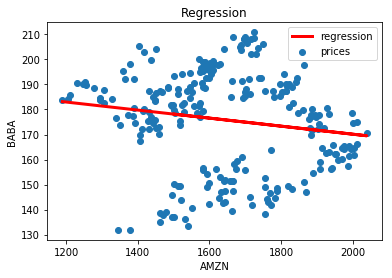

In [19]:
plt.scatter(adj_A,adj_B,label="prices")
plt.plot(adj_A,intercept+adj_A*slope,color="red",label="regression")
plt.legend()
plt.xlabel(ticker_A)
plt.ylabel(ticker_B)
plt.title("Regression")
saver("regression")
plt.show()
plt.close()

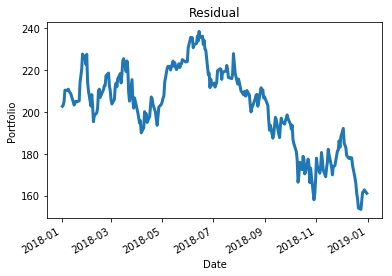

In [20]:
fig, ax = plt.subplots()
plt.plot(portfolio.index,portfolio,label="signal")
plt.ylabel("Portfolio")
plt.xlabel("Date")
plt.title("Residual")
fig.autofmt_xdate()
saver("residual")
plt.show()
plt.close()

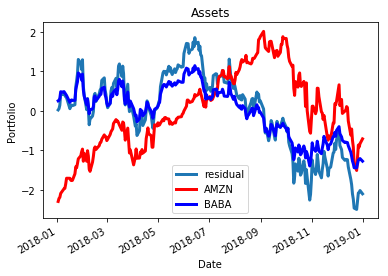

In [21]:
fig, ax = plt.subplots()
plt.plot(portfolio.index,(portfolio-portfolio.mean())/portfolio.std(),label="residual")
plt.plot(normalized_A.index,(normalized_A-normalized_A.mean())/normalized_A.std(),label=ticker_A,color=color_A)
plt.plot(normalized_B.index,(normalized_B-normalized_B.mean())/normalized_A.std(),label=ticker_B,color=color_B)
plt.legend()
plt.ylabel("Portfolio")
plt.xlabel("Date")
plt.title("Assets")
fig.autofmt_xdate()
saver("assets")
plt.show()
plt.close()

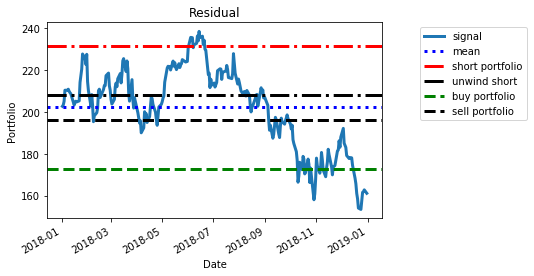

In [22]:
portfolio_mean=portfolio.mean()
portfolio_std=portfolio.std()

fig, ax = plt.subplots()
plt.plot(portfolio.index,portfolio,label="signal")
plt.axhline(portfolio_mean,color="blue",linestyle=":",label="mean")
plt.axhline(portfolio_mean+1.5*portfolio_std,color="red",linestyle="-.",label="short portfolio")
plt.axhline(portfolio_mean+0.3*portfolio_std,linestyle="-.",color="black",label="unwind short")
plt.axhline(portfolio_mean-1.5*portfolio_std,color="green",linestyle="--",label="buy portfolio")
plt.axhline(portfolio_mean-0.3*portfolio_std,linestyle="--",color="black",label="sell portfolio")
plt.legend(bbox_to_anchor=(1.1, 1))
plt.ylabel("Portfolio")
plt.xlabel("Date")
plt.title("Residual")
fig.autofmt_xdate()
saver("residual_strategy")
plt.show()
plt.close()

## signal analysis

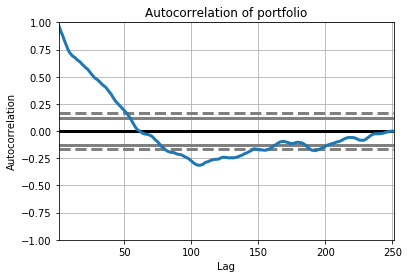

In [23]:
plt.figure()
autocorrelation_plot(portfolio)
plt.title("Autocorrelation of portfolio")
saver("acf_portfolio")
plt.show()
plt.close()

In [24]:
residual_lagged=residual.shift(periods=1)
residual_lagged.name="residual_lagged"
DF=pandas.concat([residual,residual_lagged],axis=1)
print(DF.head())
DF=DF.dropna(axis="index")
print(DF.head())

            residual  residual_lagged
Date                                 
2018-01-02  0.501786              NaN
2018-01-03  1.095515         0.501786
2018-01-04  2.892004         1.095515
2018-01-05  8.195675         2.892004
2018-01-08  8.110157         8.195675
            residual  residual_lagged
Date                                 
2018-01-03  1.095515         0.501786
2018-01-04  2.892004         1.095515
2018-01-05  8.195675         2.892004
2018-01-08  8.110157         8.195675
2018-01-09  8.673700         8.110157


In [25]:
slope_R, intercept_R, _, _, _ = scipy.stats.linregress(
    DF["residual_lagged"],DF["residual"])
print("AR slope: "+str(slope_R))
print("AR intercept: "+str(intercept_R))
noise=DF["residual"]-(intercept_R+DF["residual_lagged"]*slope_R)
noise_std=numpy.std(noise)
noise_normalized=noise/noise_std
print("noise mean",numpy.mean(noise))
print("noise std: ",noise_std)

text_str=r"$z^\circ_{{(n+1)\delta}}={:.2f}z^\circ_{{n\delta}}+{:.4f}+{:.2f}\varepsilon_{{(n+1)\delta}}$".format(slope_R,intercept_R,noise_std)
fig,ax=plt.subplots(figsize=(_,_))
ax.add_artist(offsetbox.AnchoredText(text_str, loc="center",prop=dict(size=30)))
ax.axis('off')
saver("AR_formula")
plt.show()
plt.close()

AR slope: 0.9851013775620556
AR intercept: -0.16378743562590736
noise mean 2.842170943040401e-17
noise std:  4.225310735975048


RuntimeError: libpng signaled error

RuntimeError: libpng signaled error

<Figure size 0.997857x0.997857 with 1 Axes>

## analysis of signal noise

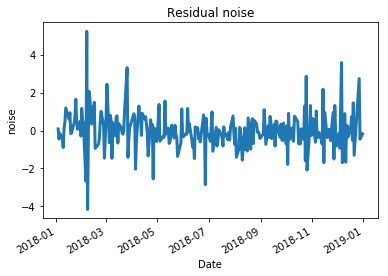

In [22]:
fig, ax = plt.subplots()
plt.plot(noise_normalized.index,noise_normalized,label="dW")
plt.ylabel("noise")
plt.xlabel("Date")
plt.title("Residual noise")
fig.autofmt_xdate()
saver("res_noise")
plt.show()
plt.close()

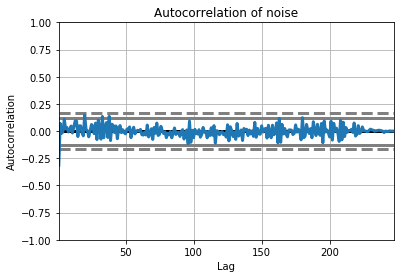

In [23]:
plt.figure()
autocorrelation_plot(noise_normalized)
plt.title("Autocorrelation of noise")
saver("acf_noise")
plt.show()
plt.close()

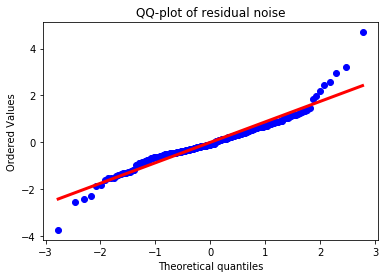

In [24]:
scipy.stats.probplot(noise.values, dist="norm", plot=plt)
plt.title("QQ-plot of residual noise")
saver("QQ")
plt.show()
plt.close()

noise mean: -2.2648549702353192e-17
noise std: 0.9999999999999998


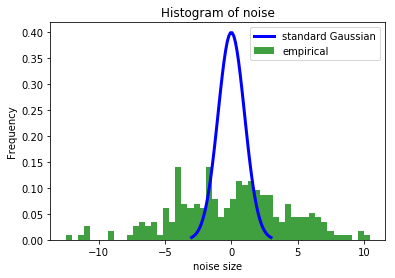

In [26]:
noise_mean=numpy.mean(noise_normalized)
noise_std=numpy.std(noise_normalized)
print("noise mean:",noise_mean)
print("noise std:",noise_std)
xvals=numpy.linspace(start=-3,stop=3)
fvals=scipy.stats.norm.pdf(xvals)
plt.figure()
plt.hist(noise, 50, facecolor='green', alpha=0.75,density=True,label="empirical")
plt.plot(xvals,fvals,label="standard Gaussian",color="blue")
plt.legend()
plt.xlabel("noise size")
plt.ylabel("Frequency")
plt.title("Histogram of noise")
saver("noise_hist")
plt.show()
plt.close()

## SDE: Ornstein-Uhlenbeck process

In [29]:
delta=1/252
print("delta: "+str(delta))
elasticity=(1-slope_R)/delta
print("elasticity: "+str(elasticity))
mean=intercept_R/elasticity/delta
print("mean: "+str(mean))
diff=noise_std/numpy.sqrt(delta)
print("diff: "+str(diff))

text_str=r"$z^\circ_{{(n+1)\delta}}-z^\circ_{{n\delta}}=-{:.2f}(z^\circ_{{n\delta}}-{:.2f})\delta + {:.2f}\left(W_{{(n+1)\delta}}-W_{{n\delta}}\right)$"
text_str=text_str.format(elasticity,mean,diff)
fig,ax=plt.subplots(figsize=(_,_))
ax.add_artist(offsetbox.AnchoredText(text_str, loc="center",prop=dict(size=30)))
ax.axis('off')
saver("OU_formula")
plt.show()
plt.close()


delta: 0.003968253968253968
elasticity: 3.7544528543619826
mean: -10.993461731654287
diff: 15.874507866387539


RuntimeError: libpng signaled error

RuntimeError: libpng signaled error

<Figure size 0.997857x0.997857 with 1 Axes>

Date
2018-01-03    0.011405
2018-01-04    0.040874
2018-01-05    0.123029
2018-01-08    0.126016
2018-01-09    0.138661
dtype: float64


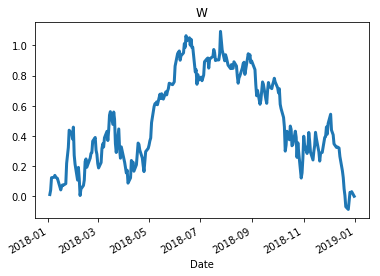

In [28]:
W=numpy.sqrt(delta)*numpy.cumsum(noise_normalized)
print(W.head())
fig, ax = plt.subplots()
plt.plot(W.index,W,label="W")
plt.xlabel("Date")
plt.title("W")
fig.autofmt_xdate()
saver("W")
plt.show()
plt.close()